# Radiohead's No Surprises - A Spatio Audio Visualisation and Analysis

## 1. Loading in HRTFs

In [1]:
import os
import numpy as np
from spatialaudiometrics import load_data as ld

audio_file_path = "No Surprises.wav"

print(f"Audio file exists: {os.path.exists(audio_file_path)}")
print(f"Working directory: {os.getcwd()}")
print(f"Files in directory: {os.listdir('.')}")

Audio file exists: True
Working directory: /Users/richardjiang/Downloads/Personal Projects/Blog Website/audio-analysis
Files in directory: ['No Surprises.wav', 'no-suprises.ipynb', 'venv', '.vscode', 'load_sonicom_sofa_temp_file.sofaj381vd8l.tmp']


In [2]:
import librosa
import soundfile as sf

try:
    audio_data, sample_rate = librosa.load(audio_file_path, sr=None)
    
    print(f"Audio loaded successfully!")
    print(f"Duration: {len(audio_data)/sample_rate:.2f} seconds")
    print(f"Sample rate: {sample_rate} Hz")
    print(f"Number of samples: {len(audio_data)}")
    
    audio_stereo, sr_stereo = librosa.load(audio_file_path, sr=None, mono=False)
    if audio_stereo.ndim > 1:
        print(f"Stereo channels: {audio_stereo.shape[0]}")
    
except Exception as e:
    print(f"Error loading audio: {e}")
    print("You may need to install librosa: pip install librosa")

Audio loaded successfully!
Duration: 229.12 seconds
Sample rate: 44100 Hz
Number of samples: 10104192


In [6]:
import pyfar as pf

signal = pf.io.read_audio("No Surprises.wav")
pf.io.write("No Surprises.sofa", signal)

# 2. Visualising HRTFs

In [ ]:
from spatialaudiometrics import visualisation as vis

hrtf = ld.load_sonicom_sofa('P0107','Windowed',48,no_itd = False)
vis.plot_source_locations(hrtf.locs, elevation_palette="mako")

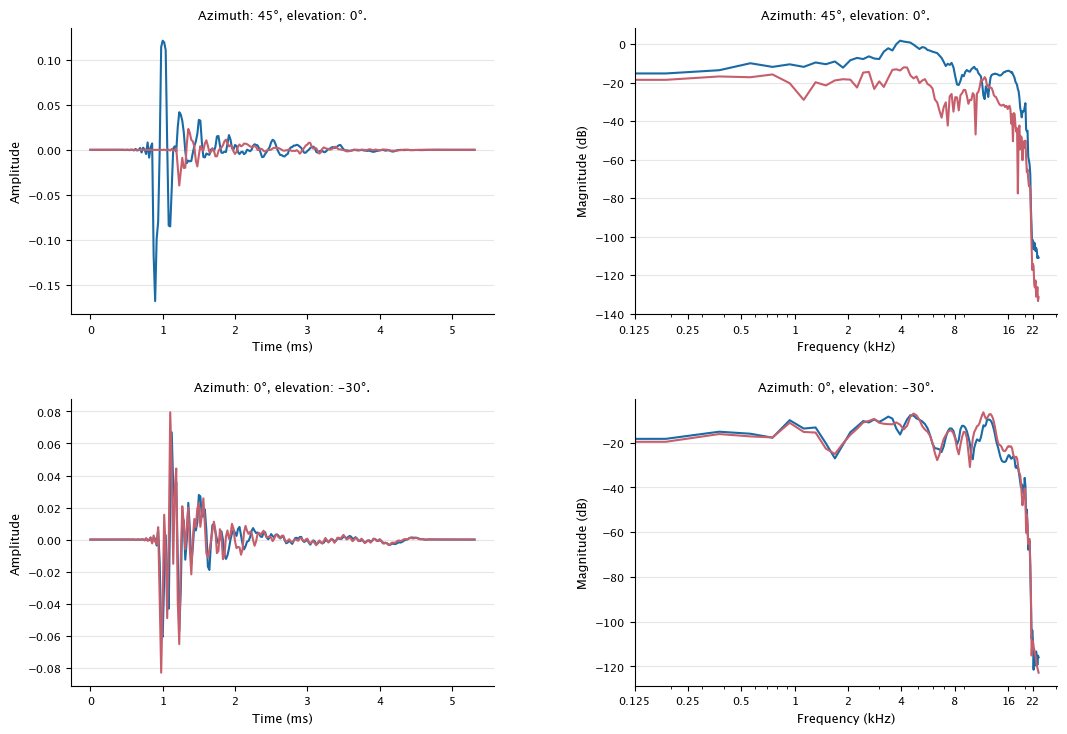

In [7]:
fig,gs = vis.create_fig()

axes = fig.add_subplot(gs[1:6,1:6])
vis.plot_hrir_both_ears(hrtf,45,0,axes)
axes = fig.add_subplot(gs[1:6,7:12])
vis.plot_hrtf_both_ears(hrtf,45,0,axes)

axes = fig.add_subplot(gs[7:12,1:6])
vis.plot_hrir_both_ears(hrtf,0,-30,axes)
axes = fig.add_subplot(gs[7:12,7:12])
vis.plot_hrtf_both_ears(hrtf,0,-30,axes)

vis.show()

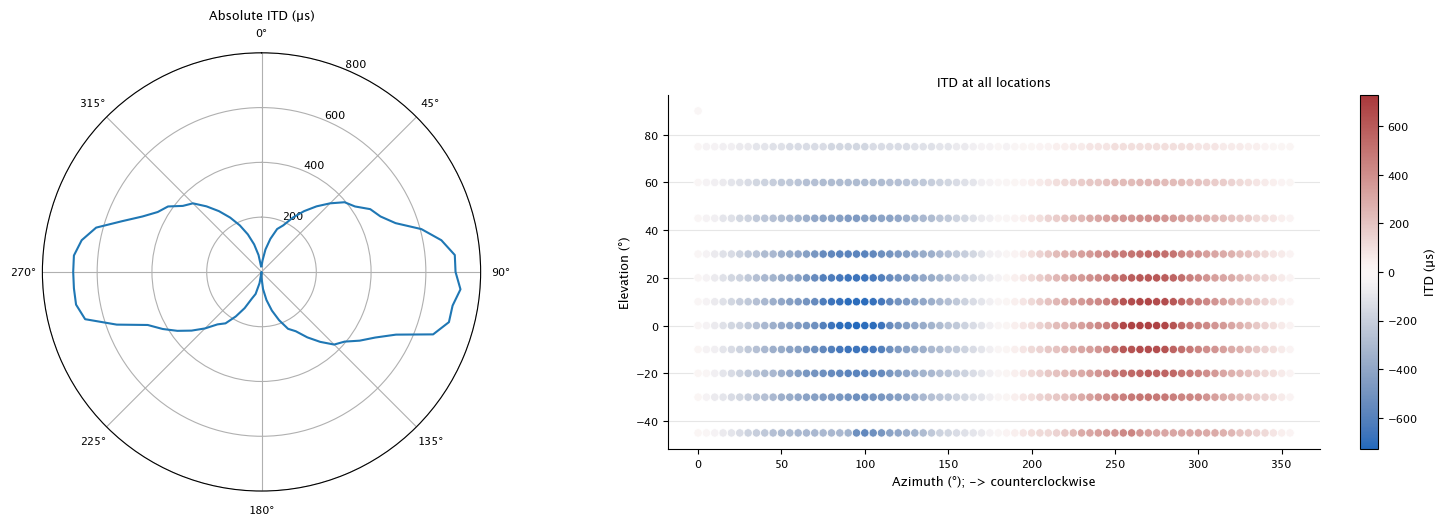

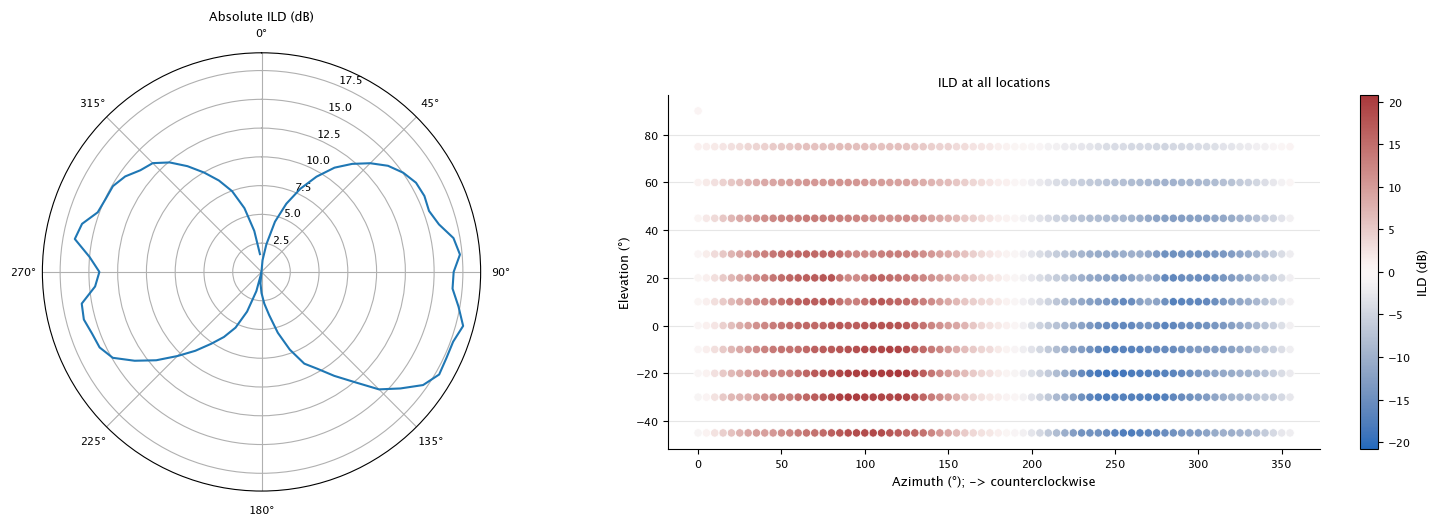

In [8]:
vis.plot_itd_overview(hrtf)
vis.plot_ild_overview(hrtf)

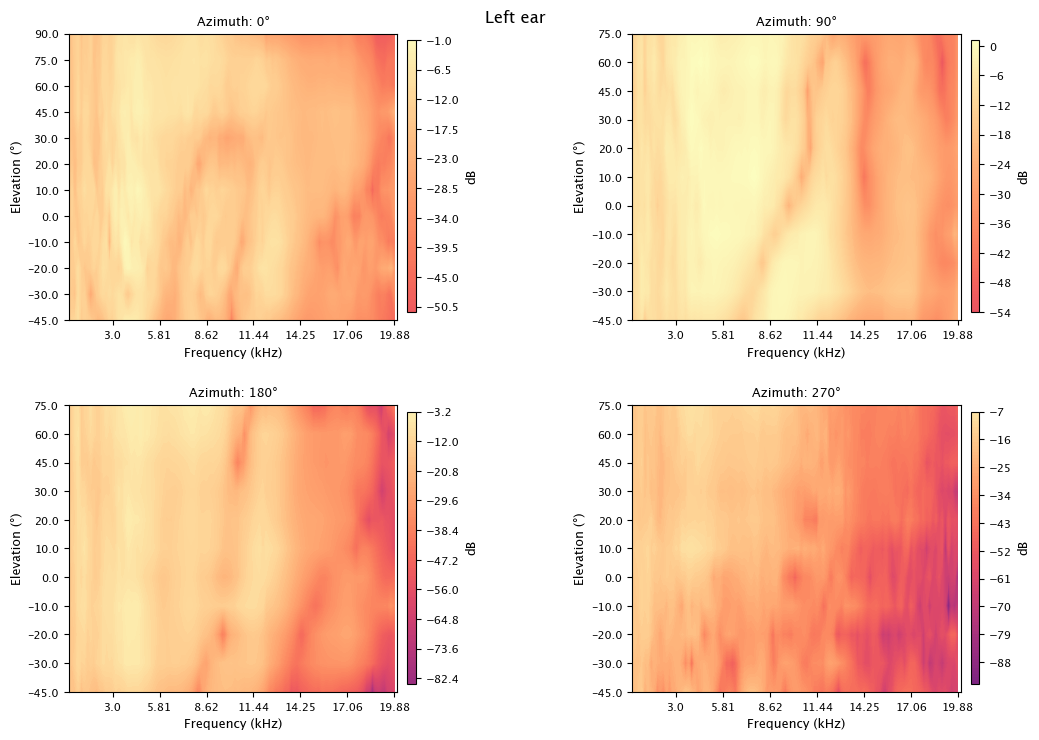

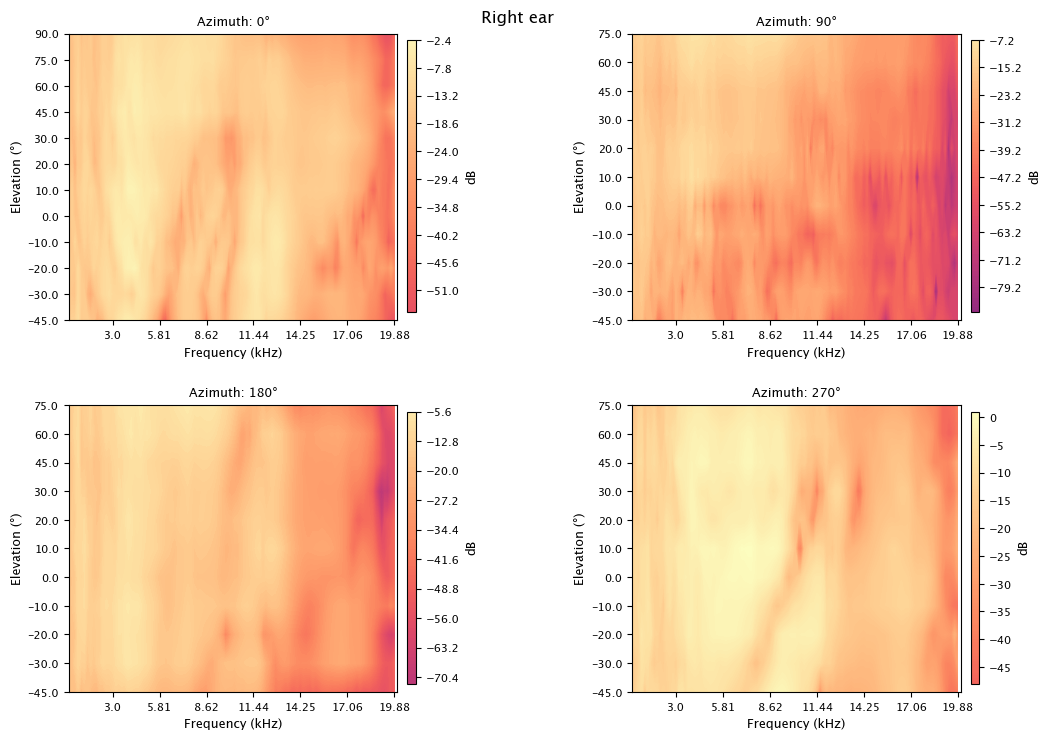

In [9]:
vis.plot_tf_overview(hrtf,az = [0,90,180,270])

## 3. Visualising Difference between HRTFs

In [10]:
from spatialaudiometrics import hrtf_metrics as hf

df = hf.generate_table_difference_hrtfs(hrtf1,hrtf2)
vis.plot_LSD_left_and_right(df)
vis.plot_ild_itd_difference(df)

NameError: name 'hrtf1' is not defined